In [31]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
# Step 2: Load the Dataset
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
print("Data loaded successfully!")

Data loaded successfully!


In [34]:
# Step 3: Explore the Data
print("\\n Dataset Info:")
df.info()

print("\\n Summary Statistics:")
print(df.describe())

print("\\n Sample Records:")
print(df.head())

\n Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
me

In [35]:
# Step 4: Feature Engineering and Preparation

# Map flight_day to numeric
day_map = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}
df["flight_day"] = df["flight_day"].map(day_map)

# New features
df["is_weekend_flight"] = df["flight_day"].isin([6, 7]).astype(int)
df["morning_flight"] = (df["flight_hour"] < 12).astype(int)

# One-hot encode categorical columns
categorical_cols = ["sales_channel", "trip_type", "route", "booking_origin"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [36]:
# Step 5: Define Features and Target
df.dropna(subset=["booking_complete"], inplace=True)

X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

In [37]:
# Step 6: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Step 7: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Step 8: Cross-Validation Scores
cv_scores = cross_val_score(model, X, y, cv=5)
print("\\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

\nCross-Validation Accuracy Scores: [0.8483 0.7646 0.7142 0.512  0.7645]
Mean Accuracy: 0.7207199999999999


In [40]:
# Step 9: Evaluate on Test Data
y_pred = model.predict(X_test)
print("\\nClassification Report:\\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\\n", confusion_matrix(y_test, y_pred))

\nClassification Report:\n               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.54      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.56      0.56     10000
weighted avg       0.82      0.85      0.81     10000

Confusion Matrix:\n [[8356  164]
 [1288  192]]


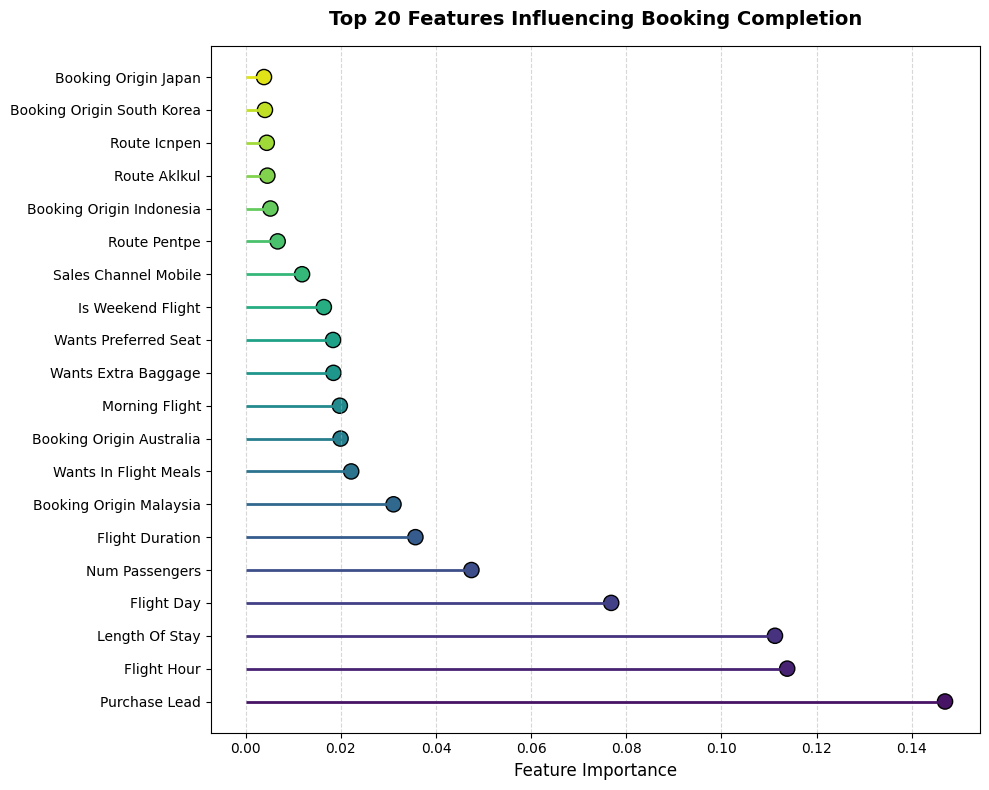

In [41]:
# Step 10: Feature Importance – Top 20 Features
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False).head(20)

# Proper feature labels
feat_imp["Feature"] = feat_imp["Feature"].str.replace("_", " ").str.title()

# Color palette
colors = sns.color_palette("viridis", len(feat_imp))

# Lollipop Chart
plt.figure(figsize=(10, 8))
plt.hlines(y=feat_imp["Feature"], xmin=0, xmax=feat_imp["Importance"], color=colors, linewidth=2)
plt.scatter(feat_imp["Importance"], feat_imp["Feature"], color=colors, s=120, edgecolor="black")

plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("")
plt.title("Top 20 Features Influencing Booking Completion", fontsize=14, weight="bold", pad=15)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

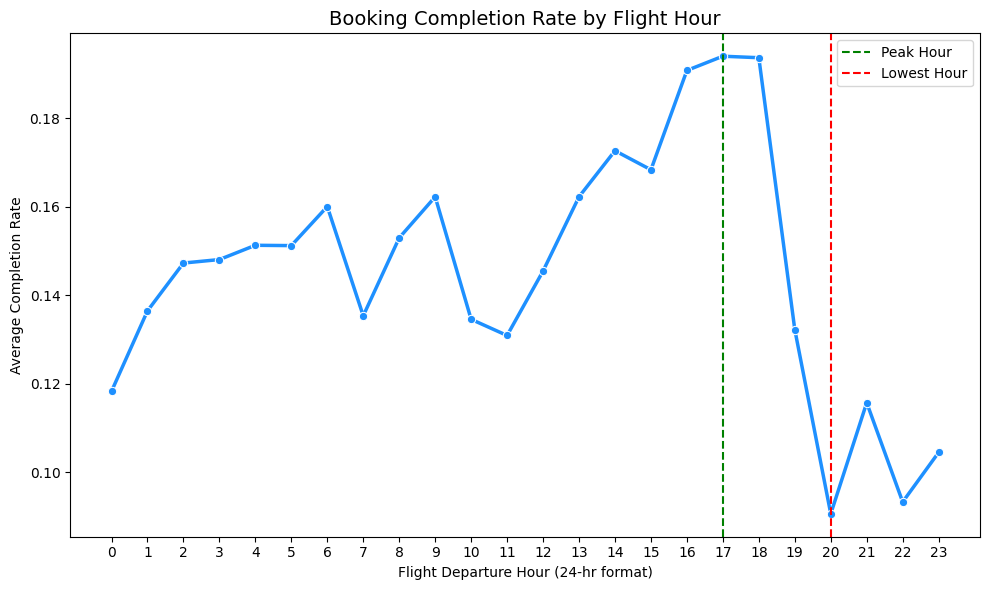

In [42]:
# Step 11: Booking Rate by Flight Hour
hourly = df.groupby("flight_hour")["booking_complete"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x="flight_hour", y="booking_complete", data=hourly, marker="o", linewidth=2.5, color="dodgerblue")
plt.axvline(x=hourly.loc[hourly["booking_complete"].idxmax(), "flight_hour"], color='green', linestyle='--', label='Peak Hour')
plt.axvline(x=hourly.loc[hourly["booking_complete"].idxmin(), "flight_hour"], color='red', linestyle='--', label='Lowest Hour')

plt.title("Booking Completion Rate by Flight Hour", fontsize=14)
plt.xlabel("Flight Departure Hour (24-hr format)")
plt.ylabel("Average Completion Rate")
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()

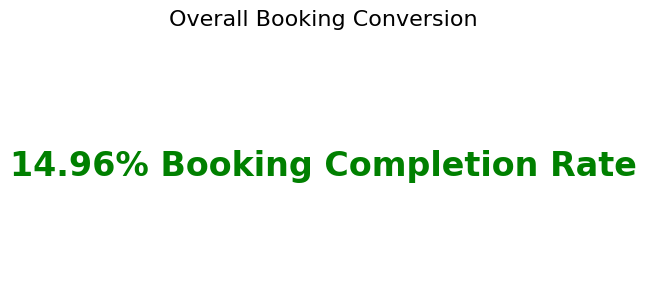

\nOverall booking completion rate: 14.96%


In [43]:
# Step 12: Overall Conversion Rate Visual
conversion_rate = df["booking_complete"].mean()

plt.figure(figsize=(6,3))
plt.text(0.5, 0.5, f"{conversion_rate:.2%} Booking Completion Rate",
         fontsize=24, fontweight='bold', ha='center', va='center', color="green")
plt.axis("off")
plt.title("Overall Booking Conversion", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print(f"\\nOverall booking completion rate: {conversion_rate:.2%}")